# The Simplest Variational Calculus Problem

We want to solve
$$
    \min \ \int_0^1 \sqrt{1 + \dot{x}(t)^2} \, \mathrm{d}t
    \quad \text{s.t.} \ x(0) = a, \ x(1) = b
$$
approximately by solving the discretized problem
$$
    \min \ \tfrac{1}{2} h \sum_{i=1}^N \sqrt{1 + \dot{x}_i^2} + \sqrt{1 + \dot{x}_{i+1}^2}
    \quad \text{s.t.} \ x_1 = a, \ x_{N+1} = b.
$$
We can choose to approximate
$$
    \dot{x}_i \approx \frac{x_{i+1} - x_{i-1}}{2h}, \quad i = 2, \dots, N,
$$
and
$$
    \dot{x}_1 \approx \frac{x_2  - x_1}{h},
    \qquad
    \dot{x}_{N+1} \approx \frac{x_{N+1} - x_N}{h}.
$$

In [1]:
using Pkg
Pkg.activate("mth8408")   # activate a walled environment

  Activating project at `C:\Users\tangi\Documents\cvs\MTH8408\notebooks_cours\mth8408`


In [2]:
Pkg.add("JuMP")
Pkg.add("Ipopt")  # add JuMP and Ipopt to our environment
Pkg.add("Plots")

    Updating registry at `C:\Users\tangi\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\tangi\Documents\cvs\MTH8408\notebooks_cours\mth8408\Project.toml`
    Updating `C:\Users\tangi\Documents\cvs\MTH8408\notebooks_cours\mth8408\Manifest.toml`
  [0dad84c5] ~ ArgTools v1.1.1 ⇒ 
  [f43a241f] ~ Downloads v1.6.0 ⇒ 
  [7b1f6079] - FileWatching
  [b27032c2] ~ LibCURL v0.6.3 ⇒ 
  [ca575930] ~ NetworkOptions v1.2.0 ⇒ 
  [44cfe95a] ~ Pkg v1.8.0 ⇒ 
  [ea8e919c] ~ SHA v0.7.0 ⇒ 
  [fa267f1f] ~ TOML v1.0.0 ⇒ 
  [a4e569a6] ~ Tar v1.10.0 ⇒ 
  [e66e0078] ~ CompilerSupportLibraries_jll v0.5.2+0 ⇒ 
  [deac9b47] ~ LibCURL_jll v7.84.0+0 ⇒ 
  [29816b5a] ~ LibSSH2_jll v1.10.2+0 ⇒ 
  [c8ffd9c3] ~ MbedTLS_jll v2.28.0+0 ⇒ 
  [14a3606d] ~ MozillaCACerts_jll v2022.2.1 ⇒ 
  [4536629a] ~ OpenBLAS_jll v0.3.20+0 ⇒ 
  [05823500] ~ OpenLibm_jll v0.8.1+0 ⇒ 
  [83775a58] ~ Zlib_jll v1.2.12+3 ⇒ 
  [8e850b90] ~ li

  [d8fb68d0] + xkbcommon_jll v1.4.1+0
  [8bb1440f] + DelimitedFiles
  [efcefdf7] + PCRE2_jll
Precompiling project...
  ✓ Contour
  ✓ IniFile
  ✓ Grisu
  ✓ Libmount_jll
  ✓ Xorg_libXdmcp_jll
  ✓ Xorg_libXau_jll
  ✓ JpegTurbo_jll
  ✓ Libgpg_error_jll
  ✓ Xorg_xtrans_jll
  ✓ Wayland_protocols_jll
  ✓ Showoff
  ✓ Xorg_libpthread_stubs_jll
  ✓ Wayland_jll
  ✓ Libgcrypt_jll
  ✓ XSLT_jll
  ✓ Libtiff_jll
  ✓ Xorg_libxcb_jll
  ✓ Glib_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll
  ✓ HTTP
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXi_jll
  ✓ Xorg_libXinerama_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ GLFW_jll
  ✓ xkbcommon_jll
  ✗ Cairo_jll
  ✓ Qt5Base_jll
  ✓ HarfBuzz_jll
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  

In [3]:
using JuMP, Ipopt

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1423
┌ Info: Precompiling Ipopt [b6b21f68-93f8-5de0-b562-5493be1d77c9]
└ @ Base loading.jl:1423


In [4]:
const N = 100    # number of discretization intervals
const h = 1 / N  # discretization step size
const a = 1      # initial height
const b = 3;     # final heigt

In [5]:
m = Model(with_optimizer(Ipopt.Optimizer));

In [6]:
@variable(m, x[i = 1 : N+1]);    # approximation de x(ti)

In [7]:
@NLexpression(m, dx[i = 2 : N], (x[i+1] - x[i-1]) / (2 * h));  # approximation de x'(ti)
@NLexpression(m, dx1, (x[2] - x[1]) / h);
@NLexpression(m, dxNp1, (x[N+1] - x[N]) / h);

In [8]:
@NLobjective(m,
             Min,
             h/2 * (sqrt(1 + dx1^2) + sqrt(1 + dx[2]^2) +
                    sum(sqrt(1 + dx[i]^2) + sqrt(1 + dx[i+1]^2) for i = 2 : N-1) +
                    sqrt(1 + dx[N]^2) + sqrt(1 + dxNp1^2)))

In [9]:
@constraint(m, x[1] == a)
@constraint(m, x[N+1] == b);
# m

In [10]:
optimize!(m)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      202

Total number of variables............................:      101
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality co

In [11]:
using LinearAlgebra
norm([0; 1] - [1; 3])

2.23606797749979

In [12]:
xs = value.(x);

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


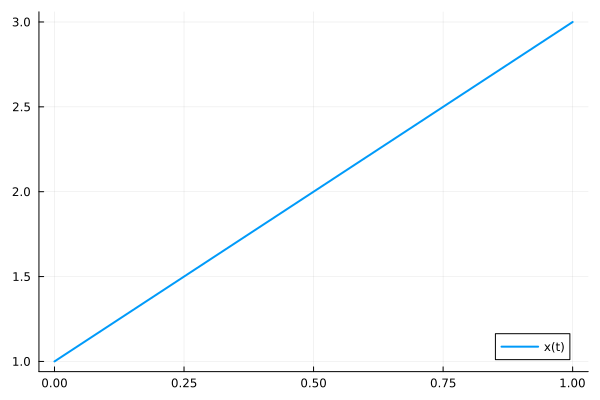

In [13]:
using Plots
plot([0:h:1], xs, linewidth=2, label="x(t)", legend=:bottomright)